# 1. Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
Df=pd.read_csv('Company_Data.csv')
Df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# 3.Data Understanding

In [4]:
Df.shape

(400, 11)

In [5]:
Df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
Df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
Df.duplicated().sum()

0

In [9]:
Df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

##### We can see that the ShelveLoc, Urban and US are categorical in nature. So, I will treat them as categorical variables.



### Summary of Variables
* There are 11 variables in the dataset.Out off 11 variables 3 variables are of categorical data type.
* These are given by Sheleveloc,Urban and US.
* Sales is the Our Target Variable.

In [11]:
Df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
# As we have to convert the sales column into categorical column 
# so need to calculate the mean first and then using lambda function categorize that column into 0's and 1's according to the mean
Df.Sales.mean()

7.496325

In [13]:
#Converting target variable in categorical variable
Df["Sales"]=np.where(Df['Sales']>8,'yes','no')
Df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,yes,138,73,11,276,120,Bad,42,17,Yes,Yes
1,yes,111,48,16,260,83,Good,65,10,Yes,Yes
2,yes,113,35,10,269,80,Medium,59,12,Yes,Yes
3,no,117,100,4,466,97,Medium,55,14,Yes,Yes
4,no,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,Good,33,14,Yes,Yes
396,no,139,23,3,37,120,Medium,55,11,No,Yes
397,no,162,26,12,368,159,Medium,40,18,Yes,Yes
398,no,100,79,7,284,95,Bad,50,12,Yes,Yes


## Label Encoding

In [14]:
LE=LabelEncoder()
Df['ShelveLoc']=LE.fit_transform(Df['ShelveLoc'])
Df['Urban']=LE.fit_transform(Df['Urban'])
Df['US']=LE.fit_transform(Df['US'])
Df['Sales']=LE.fit_transform(Df['Sales'])

In [15]:
Df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [16]:
Df.dtypes

Sales          int32
CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
dtype: object

# Declaring Feature vector & Target Variables

In [17]:
x= Df.iloc[:,1:]
y= Df.iloc[:,0]

In [18]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [19]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int32

# Splitting Data into Training & Testing Data 

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 30)

In [21]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((320, 10), (320,), (80, 10), (80,))

# Model Building & Training 

## Random Forest

In [22]:
RFC= RandomForestClassifier(n_estimators=20, random_state=0,max_features=4)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=20, random_state=0)

#### Predict the Test Set Results

In [23]:
y_pred=RFC.predict(x_test)

## Checking Accuracy Score

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,y_pred)*100

77.5

#### Let's increase the n_estimators & see accuracy of the model

##### As we can see if we increase the n_estimators then accuracy also,increases

In [26]:
kfold = KFold(10)
accuracy = []
for i in range (1,201):
    forest = RandomForestClassifier(random_state = 42, n_estimators = i)
    result = cross_val_score(forest, x, y, cv = kfold)
    accuracy.append(np.mean(result))
accuracy

[0.675,
 0.7100000000000001,
 0.6975,
 0.7125,
 0.705,
 0.74,
 0.7324999999999999,
 0.75,
 0.745,
 0.76,
 0.7449999999999999,
 0.74,
 0.7474999999999999,
 0.7675,
 0.77,
 0.77,
 0.7675,
 0.7675000000000001,
 0.7649999999999999,
 0.7675,
 0.765,
 0.7625,
 0.7725,
 0.765,
 0.77,
 0.775,
 0.785,
 0.7825,
 0.795,
 0.7875,
 0.79,
 0.7899999999999999,
 0.795,
 0.7975,
 0.7950000000000002,
 0.7949999999999999,
 0.7975,
 0.795,
 0.7975000000000001,
 0.7949999999999999,
 0.7975,
 0.7875,
 0.7874999999999999,
 0.7875,
 0.7925,
 0.7899999999999999,
 0.7899999999999999,
 0.7849999999999999,
 0.7925,
 0.795,
 0.795,
 0.8,
 0.7975000000000001,
 0.8,
 0.7975000000000001,
 0.8,
 0.795,
 0.7975,
 0.7975000000000001,
 0.795,
 0.795,
 0.7899999999999999,
 0.795,
 0.7975000000000001,
 0.7975,
 0.79,
 0.795,
 0.7925,
 0.795,
 0.795,
 0.7875,
 0.79,
 0.7975000000000001,
 0.795,
 0.7925,
 0.7925000000000001,
 0.7924999999999999,
 0.7874999999999999,
 0.7925,
 0.795,
 0.795,
 0.7975000000000001,
 0.7975000000

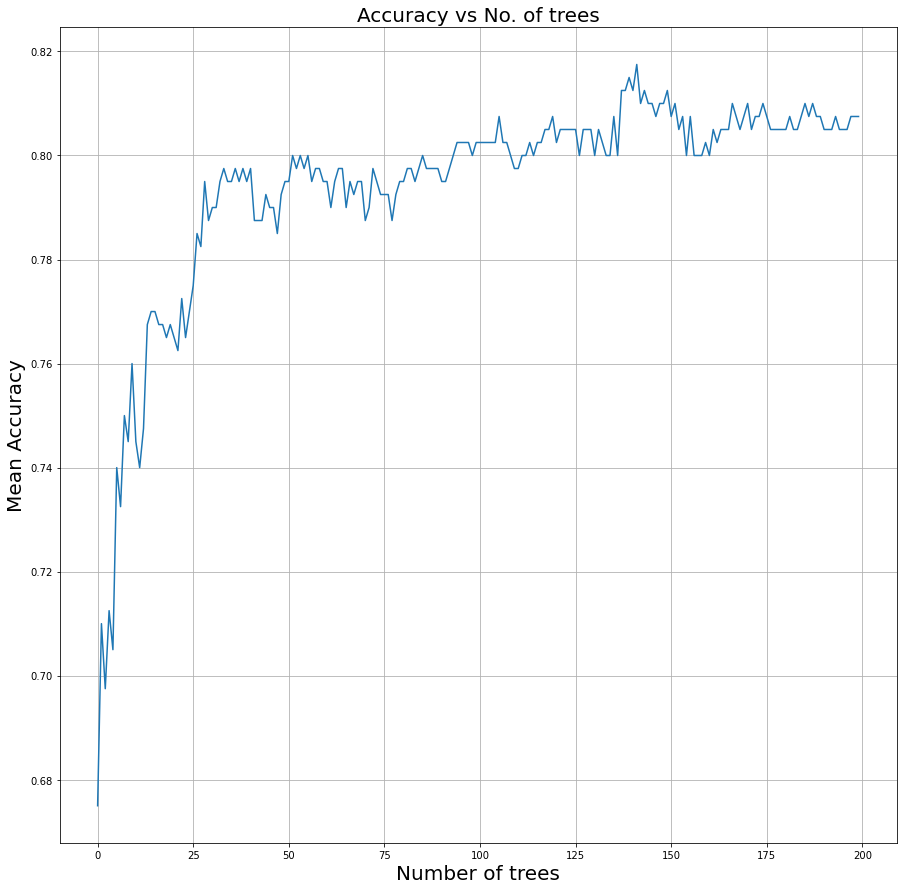

In [27]:
plt.figure(figsize=(15,15))
plt.plot(accuracy)
plt.xlabel('Number of trees',fontsize=20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Accuracy vs No. of trees', fontsize = 20)
plt.grid()
plt.show()

In [28]:
max_Accuracy=accuracy.index(max(accuracy))
max_Accuracy

141

In [29]:
RFC_1= RandomForestClassifier(n_estimators=100, random_state=0,max_features=4)
RFC_1.fit(x_train,y_train)

RandomForestClassifier(max_features=4, random_state=0)

In [30]:
RFC_2_predict=RFC_1.predict(x_test)

In [31]:
accuracy_score(y_test,RFC_2_predict)

0.7875

In [32]:
confusion_matrix(y_test,RFC_2_predict)

array([[36,  6],
       [11, 27]], dtype=int64)

In [33]:
print(classification_report(y_test,RFC_2_predict))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        42
           1       0.82      0.71      0.76        38

    accuracy                           0.79        80
   macro avg       0.79      0.78      0.78        80
weighted avg       0.79      0.79      0.79        80



# Feature Importance

### *** Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.
   First, I will create the Random Forest model as follows:-





#### Creating the Classifier with n_estimator=100

In [34]:
clf=RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [35]:
#Now, I will use the feature importance variable to see feature importance scores.

feature_scores=pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores

Price          0.218992
ShelveLoc      0.141586
Income         0.128694
CompPrice      0.117820
Age            0.115339
Advertising    0.108163
Population     0.084271
Education      0.054610
US             0.016856
Urban          0.013670
dtype: float64

##### We can see that the most important feature is Price and least important feature is Urban & US. 



# Visualize feature scores of the features ¶


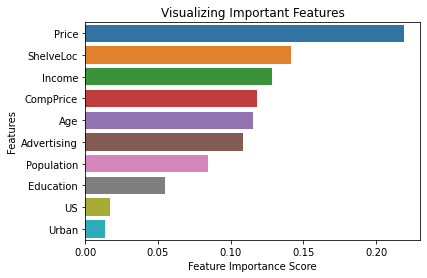

In [36]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# Building Random Forest model on selected features ¶


##### Now, I will drop the least important feature US,Urban from the model, rebuild the model and check its effect on accuracy.


### Model Building

In [37]:
X=Df.drop(['US',"Urban","Sales"],axis=1)

y=Df['Sales']

### Splitting Data into Training & Testing Data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


### Building RF Model

In [39]:
CLF=RandomForestClassifier(n_estimators=100,random_state=0)

In [40]:
CLF.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [41]:
Y_Pred=CLF.predict(X_test)

In [42]:
accuracy_score(y_test,Y_Pred)*100

77.5